In [145]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/Users/gregoiregobert/Downloads/Train_knight.csv")
df = df.drop(columns='knight')


In [146]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [147]:
variances = df_normalized.var()

variance_total = variances.sum()
variances_percentage = (variances / variance_total) * 100

variances_sorted = variances_percentage.sort_values(ascending=False)
print(variances_sorted)


Empowered        7.433689
Prescience       6.283919
Awareness        5.054834
Agility          4.969235
Evade            4.887912
Dexterity        4.619941
Burst            4.463903
Attunement       4.358295
Recovery         4.032859
Strength         3.901388
Sensitivity      3.861177
Stims            3.836185
Repulse          3.816191
Delay            3.558237
Midi-chlorien    3.502119
Combo            3.362272
Power            3.043085
Hability         2.905754
Deflection       2.790447
Reactivity       2.641638
Sprint           2.567328
Push             2.178895
Grasping         2.159327
Blocking         2.030186
Slash            1.587519
Survival         1.451656
Pull             1.439402
Lightsaber       1.165674
Mass             1.144787
Friendship       0.952147
dtype: float64


In [148]:
# Calculer la variance cumulative en pourcentage
variance_cumsum = variances_sorted.cumsum() / variances_sorted.sum()

# Trouver le nombre de compétences nécessaires pour atteindre 90 % de la variance
num_components_needed = (variance_cumsum <= 0.90).sum()

print(f"Nombre de compétences nécessaires pour atteindre 90% de la variance: {num_components_needed}")


Nombre de compétences nécessaires pour atteindre 90% de la variance: 22


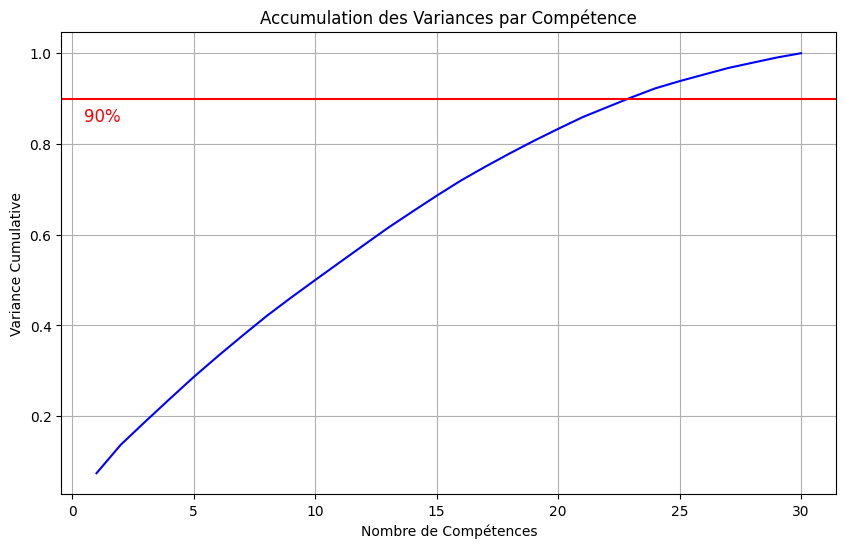

In [149]:
# Créer un graphique de la variance cumulative
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_cumsum) + 1), variance_cumsum, color='b')
plt.title('Accumulation des Variances par Compétence')
plt.xlabel('Nombre de Compétences')
plt.ylabel('Variance Cumulative')
plt.axhline(y=0.90, color='r')
plt.text(0.5, 0.85, '90%', color='red', fontsize=12)
plt.grid(True)
plt.show()
